https://stepik.org/lesson/1370106/step/6

In [ ]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = -0.5
D2 = 2.0
mean2 = [0, 2]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 500
N2 = 1000
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N1, np.dot(a[0], a[1]) / N1],
                [np.dot(a[1], a[0]) / N1, np.dot(a[1], a[1]) / N1]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N2, np.dot(a[0], a[1]) / N2],
                [np.dot(a[1], a[0]) / N2, np.dot(a[1], a[1]) / N2]])

# для гауссовского байесовского классификатора
Py1, L1 = 0.5, 1     # вероятности появления классов
Py2, L2 = 1 - Py1, 1 # и величины штрафов неверной классификации

# Функции:
# вычисление псевдовероятности
b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))
# argmax от вероятностей
am = lambda x: np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)]) * 2 - 1 # классификатор

# Предсказание по модели
predict = [am(x) for x in data_x]

TP = sum([p == y and p == 1 for p, y in zip(predict, data_y)])
TN = sum([p == y and p == -1 for p, y in zip(predict, data_y)])
FP = sum([p != y and p == 1 for p, y in zip(predict, data_y)])
FN = sum([p != y and p == -1 for p, y in zip(predict, data_y)])
TP + TN + FP + FN == N1 + N2

True

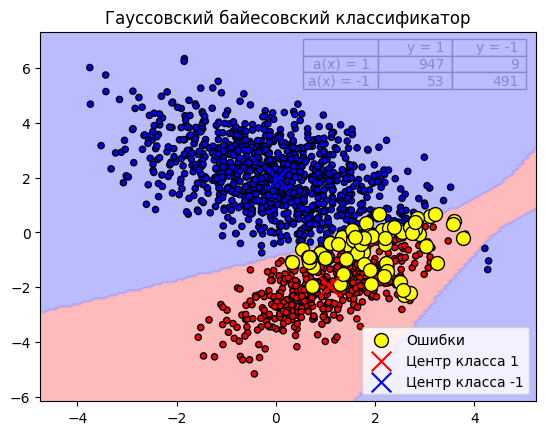

In [ ]:
'''ГРАФИК'''
# Визуализация данных и разделяющей поверхности
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Создаем сетку для построения разделяющей поверхности
x_min, x_max = data_x[:, 0].min() - 1, data_x[:, 0].max() + 1
y_min, y_max = data_x[:, 1].min() - 1, data_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Предсказание для каждой точки на сетке
Z = np.array([am(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Цветовая карта для классов
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Построение контура разделяющей поверхности
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Цветовая карта для классов
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Построение scatter plot для исходных данных с цветами классов
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, cmap=cmap_bold, edgecolor='k', s=20)

# Выделение неправильно классифицированных точек
incorrect = (predict != data_y)
plt.scatter(data_x[incorrect, 0], data_x[incorrect, 1], color='yellow', edgecolor='k', s=100, label='Ошибки')

# Отображение центров классов
plt.scatter(mm1[0], mm1[1], color='red', marker='x', s=200, label='Центр класса 1')
plt.scatter(mm2[0], mm2[1], color='blue', marker='x', s=200, label='Центр класса -1')

# Добавление таблицы с результатами классификации
table_data = [["", "y = 1", "y = -1"],
              ["a(x) = 1", TP, FP],
              ["a(x) = -1", FN, TN]]

table = plt.table(cellText=table_data,
                  loc='upper right',
                  colWidths=[0.15] *3)


plt.title("Гауссовский байесовский классификатор")
plt.legend(loc='lower right')
plt.show()
